primero identificamos el problema a resolver, teniendo reuniones con stackholder y definimos el problema a resolver

importamos las libreria a utilizar, teneemos numpy para trabajar arrays, pandas para manipulacion y tratamiento de datos estructurados. seaborn y matplotlib para vizualisacion  de datos.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.model_selection import train_test_split


Iniciamos la fase 2 con la recoleccion de datos via dataset

In [53]:
df=sns.load_dataset("titanic")

procedemos a entender la estructura del dataset

In [54]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [56]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


observvo si mi clase a predecir esta balanciada

In [57]:
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

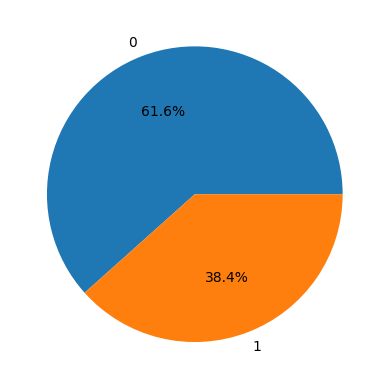

In [58]:
df["survived"].value_counts().plot.pie(autopct="%1.1f%%")

In [59]:
(df["age"].isnull().sum()*100)/len(df)

np.float64(19.865319865319865)

la columna edad muestra un 19 % de datos faltante por el cual se estaran imputando con la mediana mas adelante

In [60]:
(df["age"].isnull().sum()/len(df))*100

np.float64(19.865319865319865)

pudiendo concluis que tengo 891 filas y 15 columnas em el cual las variables eestan distribuidas de la siguiente manera bool(2), category(2), float64(2), int64(4), str(5)

In [61]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


convierto columnas categoricas ordinales en numericas con ordinal encoder ya que los datos tienen un orden

In [62]:
encoder=OrdinalEncoder()
codificar=LabelEncoder()
df["class_encoding"]=encoder.fit_transform(np.array(df["class"]).reshape(-1,1))
df["sex_encoder"]=codificar.fit_transform(np.array(df["sex"]).reshape(-1,1))

c:\Users\Easy Data\Dropbox\PC\Documents\Ciencias de Datos\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


procedo a filtrar los datos para no tomar en cuenta las variables con una baja varianza para quitar variables que son contante y no aporta informacion

In [63]:
varianza=np.var(df.select_dtypes(include=["int64","float64"]).drop(labels="survived",axis=1),axis=0)
print(varianza)
umbrall=0.1
dfpreselecion=df.select_dtypes(include=["int64","float64"]).drop(labels="survived",axis=1).columns[varianza>umbrall]
dfpreselecion

pclass               0.698231
age                210.723580
sibsp                1.214678
parch                0.648999
fare              2466.665312
class_encoding       0.698231
sex_encoder          0.228218
dtype: float64


Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'class_encoding',
       'sex_encoder'],
      dtype='str')

In [64]:
df["age"] = df["age"].fillna(df["age"].median())


procedo a realizar analizis univariado de las variables

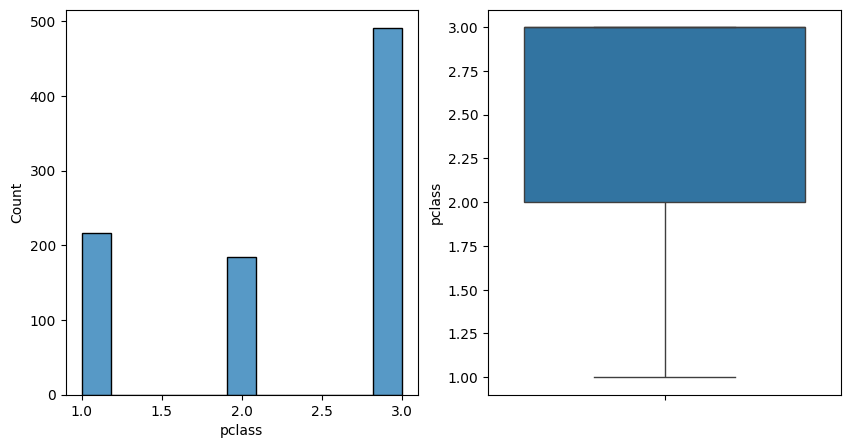

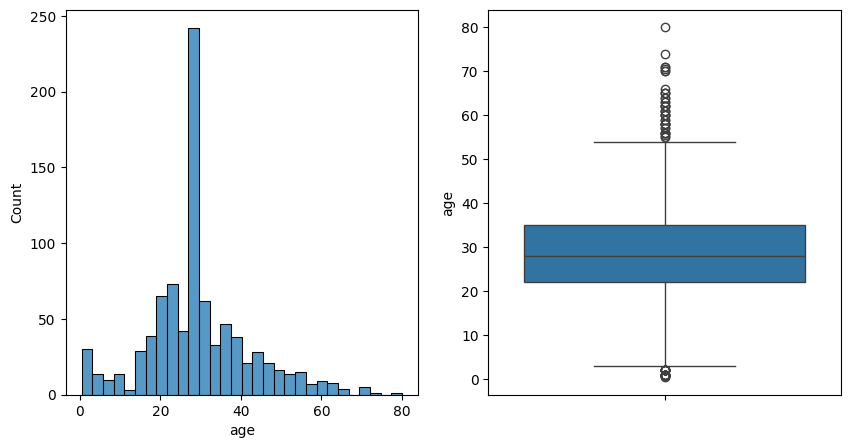

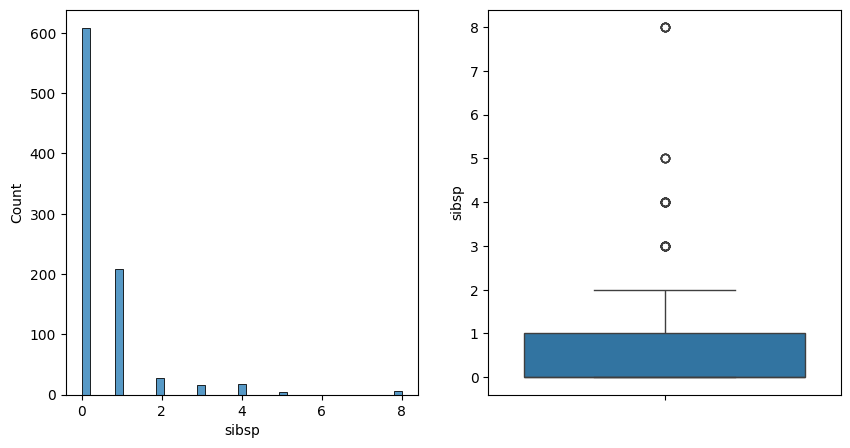

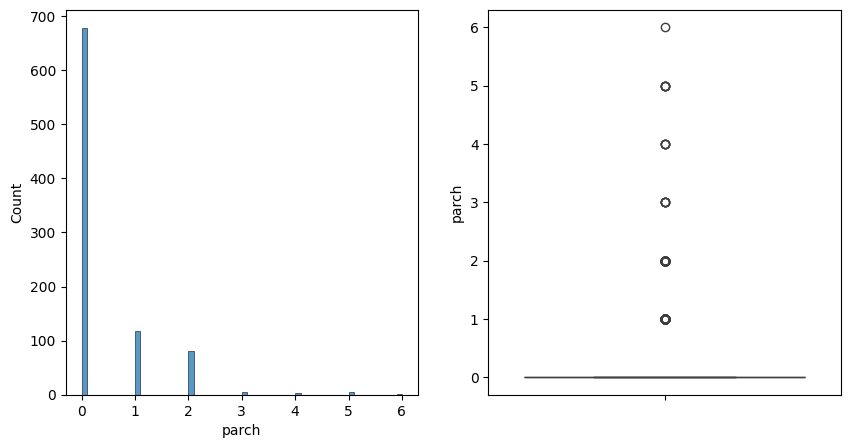

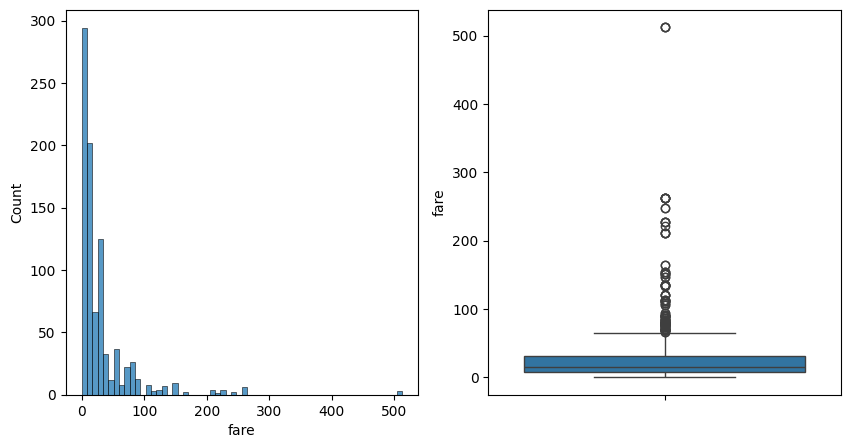

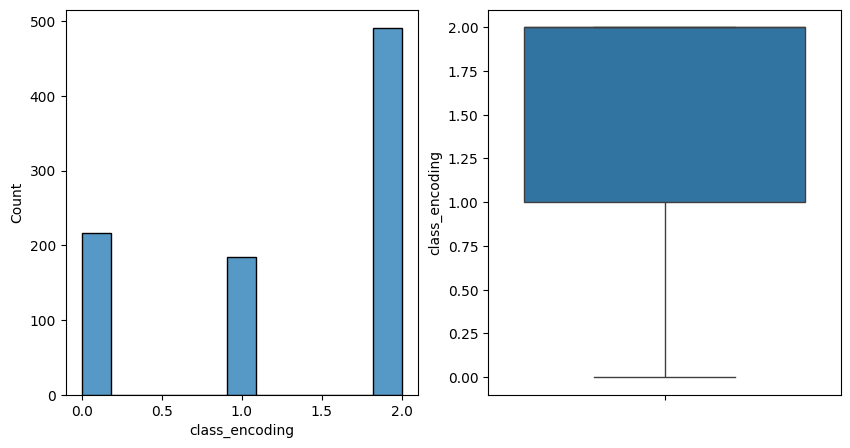

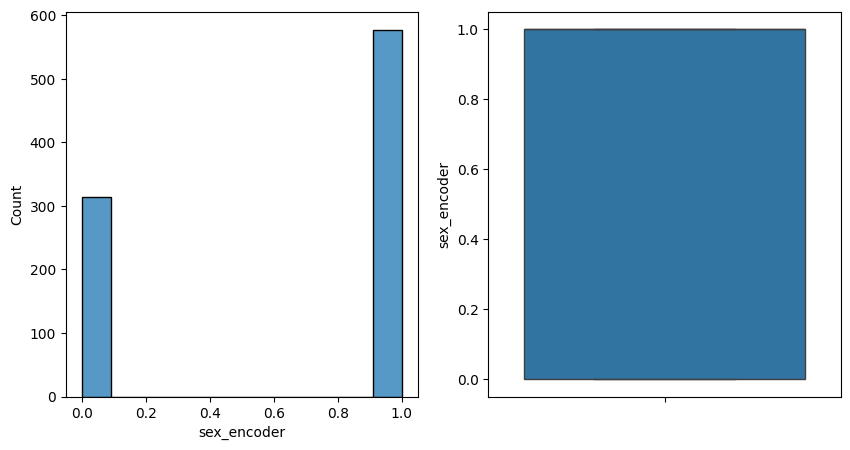

In [65]:
for i in df[dfpreselecion]:
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    sns.histplot(df[i],ax=ax[0])
    sns.boxplot(df[i],ax=ax[1])

In [66]:
x=df[dfpreselecion]
y=df["survived"]
x

,pclass,age,sibsp,parch,fare,class_encoding,sex_encoder
0,3,22.0,1,0,7.2500,2.0,1
1,1,38.0,1,0,71.2833,0.0,0
2,3,26.0,0,0,7.9250,2.0,0
3,1,35.0,1,0,53.1000,0.0,0
4,3,35.0,0,0,8.0500,2.0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1.0,1
887,1,19.0,0,0,30.0000,0.0,0
888,3,28.0,1,2,23.4500,2.0,0
889,1,26.0,0,0,30.0000,0.0,1


In [67]:
mutual_info_classif(x,y)


array([0.07342587, 0.03466919, 0.01481172, 0.02169132, 0.14818115,
       0.06159065, 0.16571362])

In [68]:
chi2(x,y)

(array([3.08736994e+01, 2.16491630e+01, 2.58186538e+00, 1.00974991e+01,
        4.51831909e+03, 5.44658660e+01, 9.27024470e+01]),
 array([2.75378563e-08, 3.27352826e-06, 1.08094210e-01, 1.48470676e-03,
        0.00000000e+00, 1.58171493e-13, 6.07783826e-22]))

no procedemos a realizar escala ya que los datos estan agrupado y tampoco realize creacion de caracteristica

In [69]:
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [70]:
model=LogisticRegression()
model.fit(X_train,Y_train)
ypredict=model.predict(x_test)


c:\Users\Easy Data\Dropbox\PC\Documents\Ciencias de Datos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
pd.DataFrame({
    "variable":x.columns,
    "coeficiente":model.coef_[0]
})

,variable,coeficiente
0,pclass,-0.450755
1,age,-0.034309
2,sibsp,-0.289414
3,parch,-0.109774
4,fare,0.003639
5,class_encoding,-0.459604
6,sex_encoder,-2.505220


In [72]:
print(classification_report(y_test,ypredict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

